### Assignment Submitted by Bhawna Singh

# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import PIL as pil
import tensorflow as tf
import keras as kr
import sklearn as sk
import zipfile
import os

In [3]:
# Mount the Google drive folder
from google.colab import drive
drive.mount('/content/drive')


# To save log files in an accesible folder, rather than in a temporary folder determined by Colab environment.
os.chdir("/content/drive/MyDrive/All_LogFiles")
print("You are now working in:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
You are now working in: /content/drive/MyDrive/All_LogFiles


In [4]:

# set google-drive or local data folder path
root_data_folder_path = "/content/drive/MyDrive/Work/MyLearnings/Data/"

INPUT_DIR = os.path.join(root_data_folder_path, 'Dataset_Waste_Segregation/')
OUTPUT_DIR = os.path.join(root_data_folder_path, 'Dataset_Waste_Segregation/')


Load the dataset.

In [5]:
# Load and unzip the dataset


def unzip_image_data() :

  zip_filepath = os.path.join(INPUT_DIR, 'data.zip')

  if not os.path.exists(zip_filepath):
    print(f"Error: The ZIP file '{zip_filepath}' does not exist.")
  else :
    if OUTPUT_DIR and not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        print(f"Created extraction directory: {OUTPUT_DIR}")

    try:
        with zipfile.ZipFile(zip_filepath, 'r') as zf:
            zf.extractall(path=OUTPUT_DIR)
        print(f"Successfully unzipped '{zip_filepath}'\n to '{OUTPUT_DIR if OUTPUT_DIR else os.getcwd()}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_filepath}' is not a valid ZIP file.")
    except Exception as e:
        print(f"An error occurred during unzipping: {e}")


# Call the function to upzip images
# unzip_image_data()


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [6]:
# Create a function to load the raw images

# This function is not used as yet

def load_images(file_path) :

  images = []
  # 'walk' through all directories and files in the given directory
  for root, dirs, files in os.walk(file_path):
      for file in files:
          # Check for common image file extensions
          if file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
              input_path = os.path.join(root, file)

              # Get the relative path from the given dir
              relative_path = os.path.relpath(root, file_path)

              try:
                  # Open the image
                  with pil.Image.open(input_path) as img:
                      images.append({"Image":img, "Path":input_path})
                      # print(f"loaded: {input_path}")
              except Exception as e:
                  print(f"\nError processing image {input_path}: {e}\n")
  return images

# Call the method
# lst_images = load_images(os.path.join(OUTPUT_DIR, 'data'))

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [7]:
# Get the images and their labels

def load_images_and_categories(directory_path) :
    subfolder_names = []
    images_lst = []

    for item_name in os.listdir(directory_path):
        #print(item_name)
        folder_path = os.path.abspath(directory_path)
        item_path = os.path.join(folder_path, item_name)

        if os.path.isdir(item_path):
            #print(f'{item_path} is a folder')
            subfolder_names.append(item_name)

            for filename in os.listdir(item_path):

                # Construct the full path to the image file
                file_path = os.path.join(item_path, filename)

                # Check if it's a file and not a directory
                if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    try:
                        # Attempt to open the image file
                        img = pil.Image.open(file_path)
                        images_lst.append({'Image': img, 'Category': item_name, 'Path': file_path})
                    except IOError:
                        # Handle cases where a file might not be a valid image
                        print(f"Warning: Could not open or identify image file: {filename}")

    return images_lst




In [8]:
# Call the function to load images and assign categories
images = load_images_and_categories(os.path.join(OUTPUT_DIR, 'data'))

# Create a dataframe
df_waste_seg = pd.DataFrame(images)


Data at 2690 index  
Category=Other
Image=


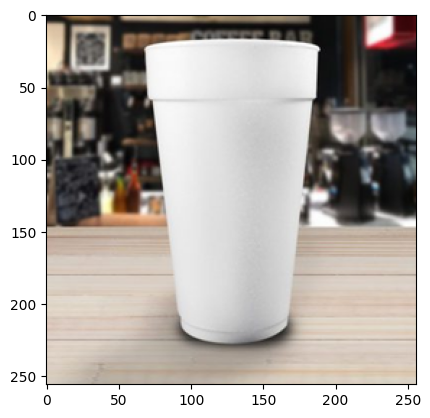

In [9]:
# Verifying that the images and labels are loaded
# correctly, by displaying one random image

import random

random_image_idx = random.randint(0, len(df_waste_seg))
selected_img = df_waste_seg.iloc[random_image_idx]
print(f'Data at {random_image_idx} index  \nCategory={selected_img['Category']}\nImage=')

plt.imshow(selected_img['Image'])

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [10]:
len(df_waste_seg)

7625

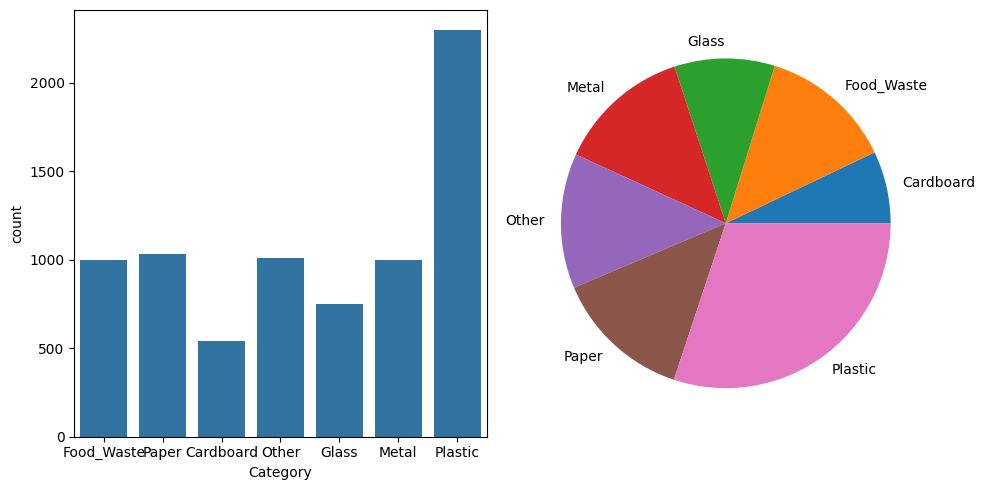

In [11]:
# Visualise Data Distribution

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(x='Category', data=df_waste_seg, ax=ax1)

df_waste_seg.groupby('Category').size().plot(kind='pie', ax=ax2)
plt.tight_layout()
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [12]:
# Visualise Sample Images (across different labels)


def visualize_some_images(df_images, label_classes, samples_per_label=2):

  labels = label_classes

  # Adjusting figure size for displaying the images based on number of labels
  plt.figure(figsize=(15, 5 * len(labels)))

  for i, label in enumerate(labels):

      # Select random samples
      img_category = df_images[df_images.Category == label]
      images_only = list(img_category['Image'])
      selected_samples = random.sample(images_only, min(samples_per_label, len(images_only)))

      for j, img in enumerate(selected_samples):

          ax = plt.subplot(len(labels), samples_per_label, i * samples_per_label + j + 1)
          ax.imshow(img)
          ax.set_title(f"{label} - Sample {j+1}")

          # This hides axes for cleaner visualization
          ax.axis('off')

  plt.tight_layout()
  plt.show()



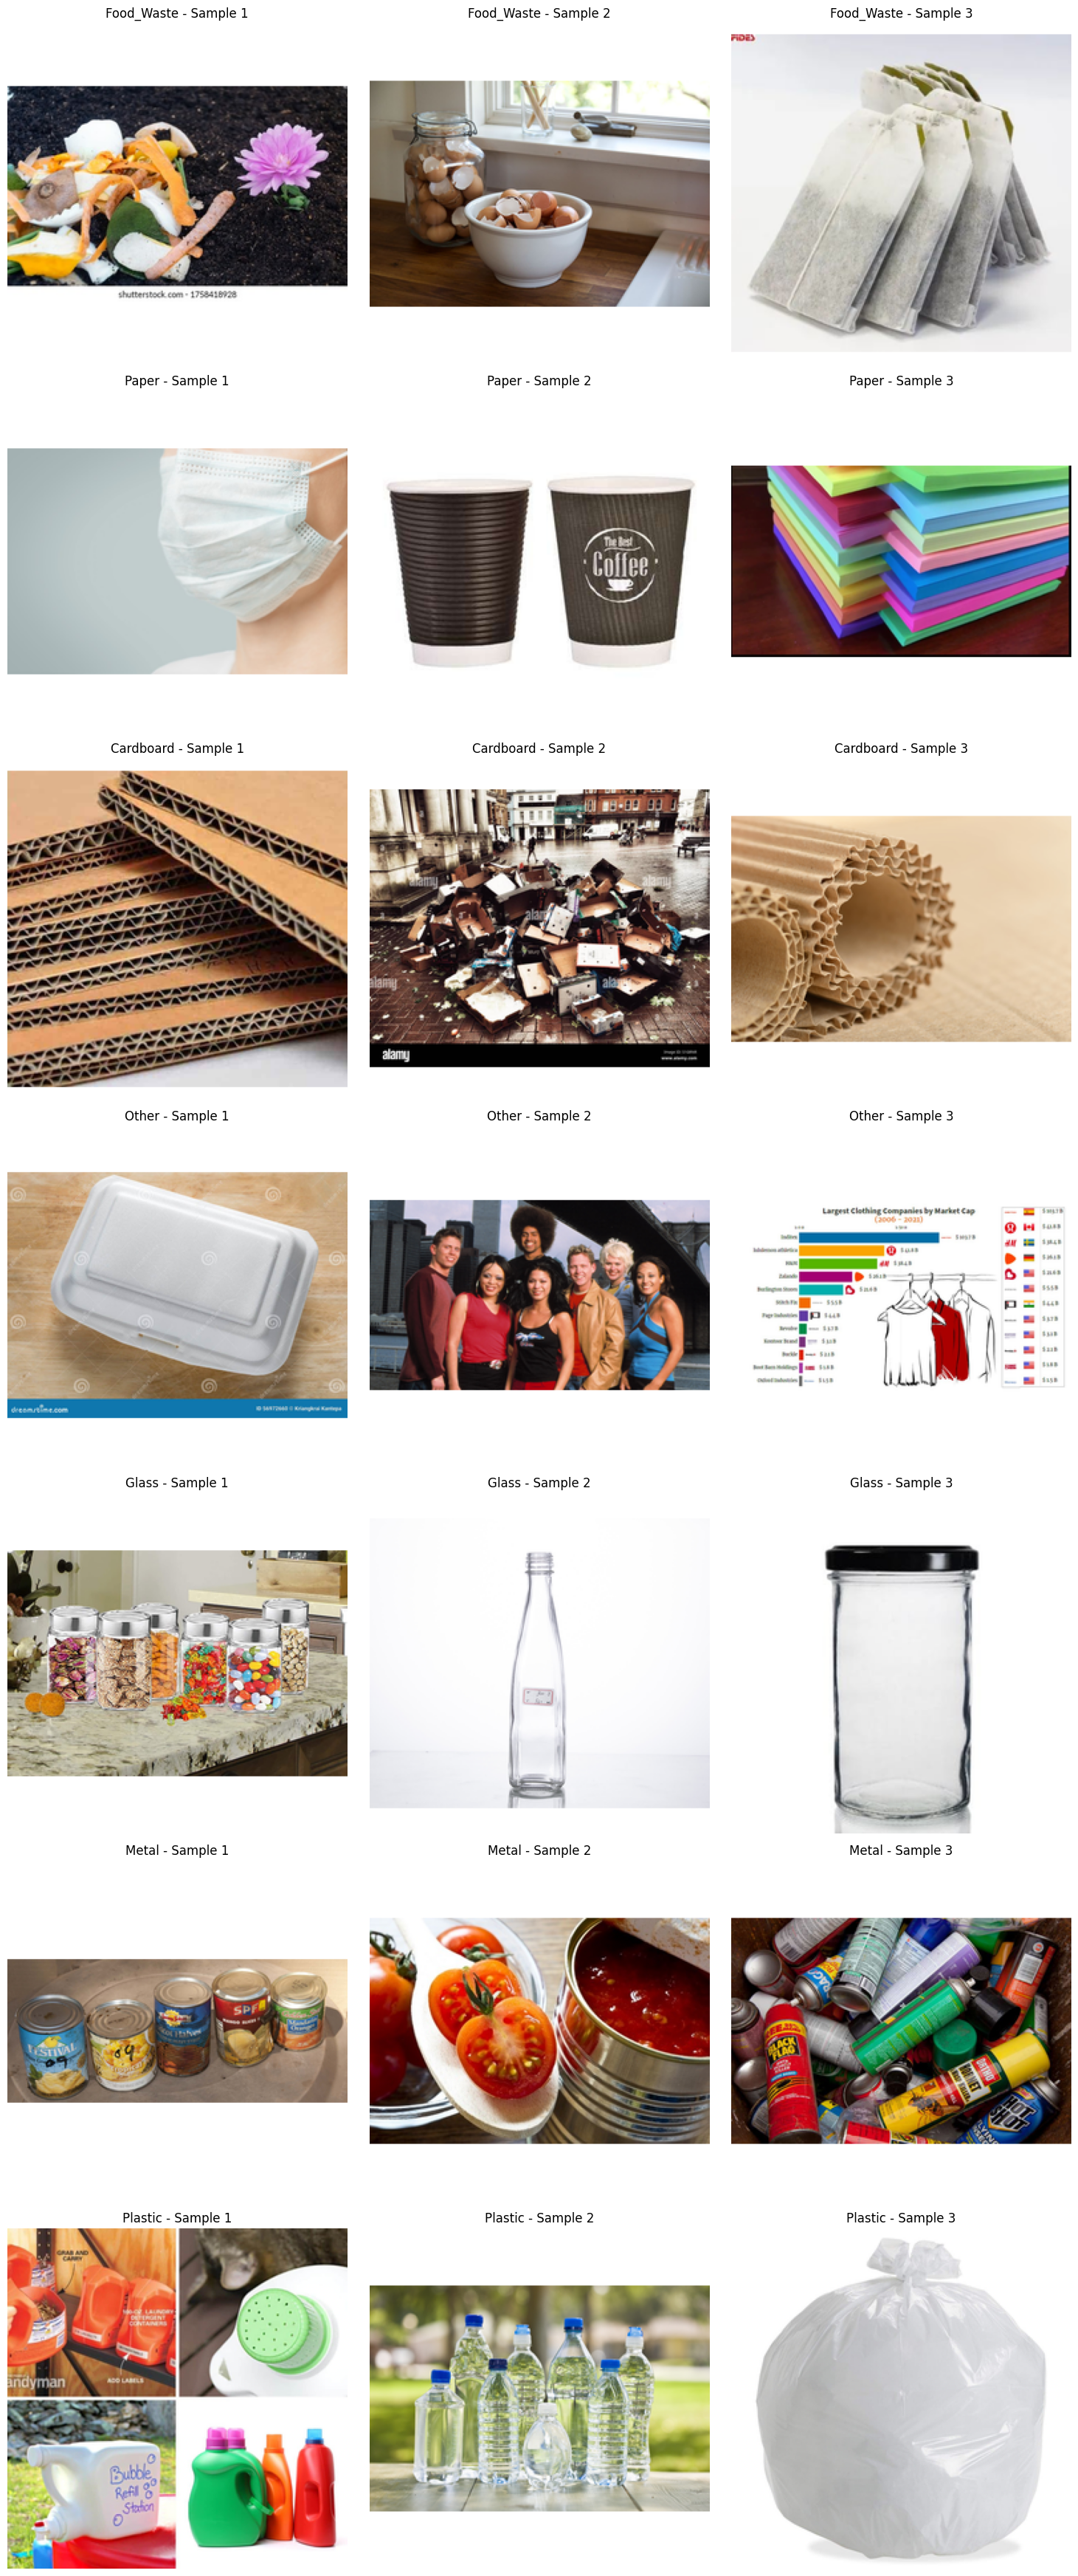

In [13]:
CATEGORIES = df_waste_seg['Category'].unique()
visualize_some_images(df_waste_seg, CATEGORIES, samples_per_label=3)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [14]:

def get_smallest_image_dim(image_df):

  # Initialize minimum width and height by a very large number
  min_width = float('inf')
  min_height = float('inf')

  for image_obj in image_df['Image']:

    try:
      width, height = image_obj.size
      if width < min_width and height < min_height:
          # print('Found one smaller')
          min_width = width
          min_height = height
    except IOError:
        print(f"Error Accessing image")

    return min_height, min_width



In [15]:
# Call the function to find smallest dimension
smallest_dimension = get_smallest_image_dim(df_waste_seg)
print('Smallest dimension=', smallest_dimension)

Smallest dimension= (256, 256)


In [16]:
# Resize the image dimensions

# Path to your original image
# Path to save the resized image
output_path = os.path.join(root_data_folder_path, "Resized_Data")

def resize_images(image_df, img_size) :
  # Open the image
  for image_obj in image_df['Image']:

    try:

      # Resize the image while maintaining aspect ratio
      image_obj = image_obj.thumbnail(img_size)


    except IOError:
        print(f"Error Accessing image")

    return



In [17]:
# Call the function to resize the images( not yet stored physically )

resize_images(df_waste_seg, smallest_dimension)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [18]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

TARGET_COL = 'Category_encoded'

# Fit and transform the target variable
df_waste_seg[TARGET_COL] = le.fit_transform(df_waste_seg['Category'])

# Check the mapping
print(le.classes_)
print("\n", df_waste_seg.columns)


#print(dict(zip(le.classes_, range(len(le.classes_)))))

['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']

 Index(['Image', 'Category', 'Path', 'Category_encoded'], dtype='object')


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [19]:
# Drop unnecessary columns
df_final_waste_seg = df_waste_seg.drop(columns=['Category','Path'])

# Check the columns
print(f'df_final_waste_seg.columns = {df_final_waste_seg.columns}')
print(f'df_waste_seg.columns       = {df_waste_seg.columns}')

df_final_waste_seg.columns = Index(['Image', 'Category_encoded'], dtype='object')
df_waste_seg.columns       = Index(['Image', 'Category', 'Path', 'Category_encoded'], dtype='object')


In [20]:
# Split dataset into training and validation set. (also created test set for final evaluation

# Import necesary libraries
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

# Define some configs/constants
# ==================== CONFIG ====================
IMG_SIZE    = 128        # or 224 if you have GPU
BATCH_SIZE  = 32
EPOCHS      = 25
TRAIN_SPLIT = 0.7        # 70% train
VAL_SPLIT   = 0.15       # 15% val
TEST_SPLIT  = 0.15       # 15% test

# ==================== TRAIN/VAL/TEST SPLIT ====================
# First split: train + temp (val + test)
train_df, temp_df = train_test_split(df_final_waste_seg, test_size=(1 - TRAIN_SPLIT),
                                     stratify=df_final_waste_seg[TARGET_COL], random_state=42)

# Second split: val + test from temp
val_df, test_df = train_test_split(temp_df, test_size=(TEST_SPLIT / (VAL_SPLIT + TEST_SPLIT)),
                                   stratify=temp_df[TARGET_COL], random_state=42)



train_df = train_df.reset_index(drop=True)
val_df   = val_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)


print(f"Train: {len(train_df)} images | Val: {len(val_df)} | Test: {len(test_df)}")

# Encode the target column/feature again for each of the
# training, validatoin and test sets and create separate
# store for their respective target feature/column
le = LabelEncoder()
train_labels = le.fit_transform(train_df[TARGET_COL])
val_labels   = le.transform(val_df[TARGET_COL])
test_labels  = le.transform(test_df[TARGET_COL])

num_classes = len(le.classes_)
print(f"Classes ({num_classes}): {le.classes_}")

Train: 5337 images | Val: 1144 | Test: 1144
Classes (7): [0 1 2 3 4 5 6]


In [21]:

# This function is written in this way as loading such a large dataset
# of images was crashing the runtime environment. Hence the code was
# refractored to find predataset

# ==================== Function to read image data and convert it to a tensor ====================

# Code to remove mismatch errors
def make_dataset(df_part, is_training=False):
    # reset index
    df_safe = df_part.reset_index(drop=True).copy()

    def generator():
        for idx in range(len(df_safe)):
            # Get image
            pil_img = df_safe.loc[idx, 'Image']
            img = pil_img.resize((IMG_SIZE, IMG_SIZE)).convert('RGB')
            arr = img_to_array(img) / 255.0

            # Get label
            label_str = df_safe.loc[idx, TARGET_COL]
            label_int = int(le.transform([label_str])[0])

            yield arr, label_int

    ds = tf.data.Dataset.from_generator(
        generator,
        output_types=(tf.float32, tf.int32),
        output_shapes=((IMG_SIZE, IMG_SIZE, 3), ())
    )



  # if is_training:
    if is_training:
        ds = ds.shuffle(buffer_size=1000).repeat()
  #     ds = ds.shuffle(buffer_size=1000).repeat()   # ← ADD .repeat() HERE

    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

# ——————————————————— CREATE DATASETS (run exactly like this) ———————————————————
train_df = train_df.reset_index(drop=True)
val_df   = val_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

train_dataset = make_dataset(train_df, is_training=True)
val_dataset   = make_dataset(val_df,   is_training=False)
test_dataset  = make_dataset(test_df,  is_training=False)

steps_per_epoch   = len(train_df) // BATCH_SIZE
validation_steps  = len(val_df)   // BATCH_SIZE
test_steps        = len(test_df)  // BATCH_SIZE

print(f"Datasets ready → Train:{len(train_df)} Val:{len(val_df)} Test:{len(test_df)}")
# ——————————————————— END OF SAFE DATASET CODE ———————————————————


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


Datasets ready → Train:5337 Val:1144 Test:1144


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [22]:
# Import modules

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import relu
from tensorflow.keras import layers

# CODE

In [23]:
# ==================== CREATING A CNN MODEL (with BatchNorm + Dropout) ====================

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    # Conv Block 1
    layers.Conv2D(32, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Conv Block 2
    layers.Conv2D(64, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Conv Block 3
    layers.Conv2D(128, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Using GlobalAveragePooling2D for better flattening for large image dataset
    layers.GlobalAveragePooling2D(),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
], name="CNN_with_BatchNorm_3Conv")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "CNN_with_BatchNorm_3Conv"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,831 (647.78 KB)

 Trainable params: 164,359 (642.03 KB)

 Non-trainable params: 1,472 (5.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [24]:
# DELETE
print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("GPU Name:       ", tf.test.gpu_device_name())
# DELETE

GPU Available:  []
GPU Name:        


In [25]:
# This code was added to ensure a new best_model.keras file is created for each run of the model.
# This was done because I wanted to recreate a fresh start everytime I ran/fit the model on training data
# Though this can be commented out if I do not need a fresh start and would want to train from the last saved checkpoint.
# checkpoint_file = "best_model.keras"
# if os.path.exists(checkpoint_file):
#     os.remove(checkpoint_file)
#     print(f"Deleted {checkpoint_file} → starting from scratch like the first time")


from datetime import datetime
checkpoint_file = f"best_model_{datetime.now().strftime('%Y%m%d_%H%M%S')}.keras"
print(f"checkpoint_file name: {checkpoint_file}")


checkpoint_file name: best_model_20251125_133011.keras


In [26]:
# ==================== Train-ing the model with CALLBACKS ====================
callbacks_list = [
    callbacks.EarlyStopping(patience=7, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-7),
    # callbacks.ModelCheckpoint("best_model.keras", save_best_only=True),
    callbacks.ModelCheckpoint(checkpoint_file, save_best_only=True),
    callbacks.CSVLogger("training_log.csv")
]

# ==================== TRAIN-ing on ( train + val ) ====================
print("\n=== TRAINING PHASE ===\n")
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    verbose=1
)




=== TRAINING PHASE ===

Epoch 1/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.2788 - loss: 2.0472 - val_accuracy: 0.1348 - val_loss: 2.4807 - learning_rate: 0.0010
Epoch 2/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.3480 - loss: 1.7880 - val_accuracy: 0.1464 - val_loss: 2.2347 - learning_rate: 0.0010
Epoch 3/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.3880 - loss: 1.7070 - val_accuracy: 0.2491 - val_loss: 1.7731 - learning_rate: 0.0010
Epoch 4/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.4188 - loss: 1.6118 - val_accuracy: 0.2741 - val_loss: 2.3288 - learning_rate: 0.0010
Epoch 5/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.4394 - loss: 1.5189 - val_accuracy: 0.3768 - val_loss: 1.9328 - learning_rate: 0.0010
Epoch 6/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.4394 - loss: 1.5053 - val_accuracy: 0.3661 - val_loss: 2.3744 - learning_rate: 0.0010
Epoch 7/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - ac

TRAINING HISTORY
    Epoch  Train Accuracy  Val Accuracy  Train Loss  Val Loss
0       1          0.3072        0.1348      1.9594    2.4807
1       2          0.3534        0.1464      1.7725    2.2347
2       3          0.3859        0.2491      1.6713    1.7731
3       4          0.4234        0.2741      1.5856    2.3288
4       5          0.4465        0.3768      1.5194    1.9328
5       6          0.4512        0.3661      1.4861    2.3744
6       7          0.4880        0.4054      1.3989    1.8376
7       8          0.4962        0.3420      1.3658    2.5232
8       9          0.5104        0.3562      1.3400    1.8065
9      10          0.5388        0.4955      1.2763    1.3740
10     11          0.5318        0.4589      1.2658    1.4976
11     12          0.5533        0.5312      1.2366    1.2845
12     13          0.5523        0.4929      1.2440    1.3295
13     14          0.5474        0.4875      1.2382    1.3940
14     15          0.5715        0.4089      1.1877  

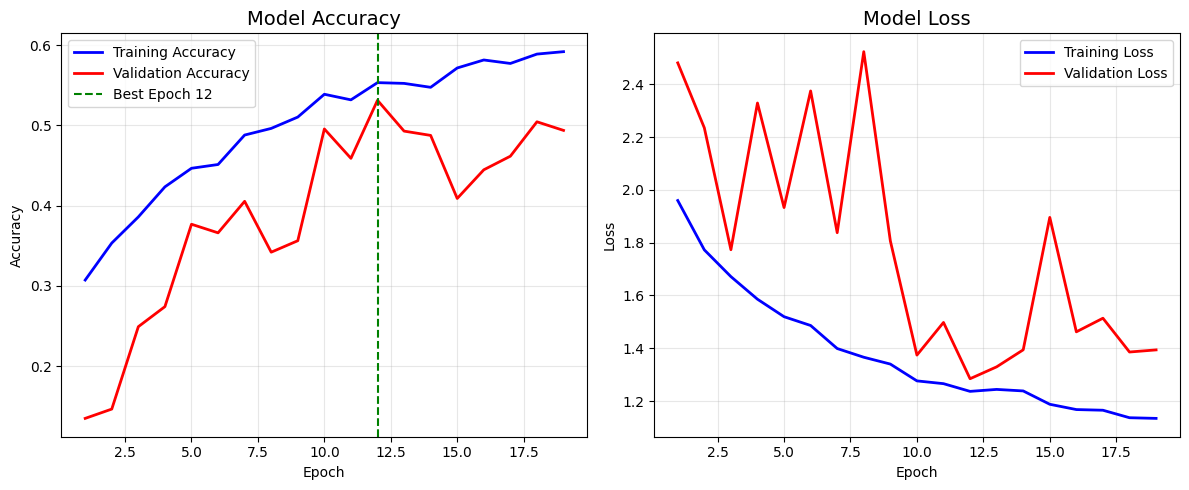

In [28]:
# CODE
# Plotting Training and Validation accuracy over all epochs

# Extract values for training and validation sets for all the epochs that were run.
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Preparing a dataframe of the accuracy/loss values for easier plotting
results_df = pd.DataFrame({
    'Epoch': epochs,
    'Train Accuracy': train_acc,
    'Val Accuracy'  : val_acc,
    'Train Loss'    : train_loss,
    'Val Loss'      : val_loss
})

# Get best validation accuracy and the epoch at which it occured.
best_epoch = results_df['Val Accuracy'].idxmax() + 1
best_val_acc = results_df['Val Accuracy'].max()

# Display the data in tabular form.
print("TRAINING HISTORY")
print(results_df.round(4))
print(f"\nBEST VALIDATION ACCURACY: {best_val_acc:.4f} at Epoch {best_epoch}")

# Plot the accuracy and loss for training and validation datasets.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axvline(best_epoch, color='green', linestyle='--', label=f'Best Epoch {best_epoch}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
# CODE

In [30]:
print(f"Final Training Accuracy  : {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Best Training Accuracy : {max(train_acc):.4f} (at epoch {train_acc.index(max(train_acc))+1})")
print(f"Best Validation Accuracy : {max(val_acc):.4f} (at epoch {val_acc.index(max(val_acc))+1})")

Final Training Accuracy  : 0.5919
Final Validation Accuracy: 0.4938
Best Training Accuracy : 0.5919 (at epoch 19)
Best Validation Accuracy : 0.5312 (at epoch 12)


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.


EVALUATING ON TEST SET...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Test Loss     : 1.3386
Test Accuracy : 0.5184 (51.84%)
True labels  : 1144 samples
Predictions  : 1144 samples

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.32      0.45        81
           1       0.67      0.63      0.65       150
           2       0.52      0.54      0.53       113
           3       0.84      0.17      0.29       150
           4       0.33      0.60      0.43       151
           5       0.48      0.33      0.39       155
           6       0.55      0.71      0.62       344

    accuracy                           0.52      1144
   macro avg       0.59      0.47      0.48      1144
weighted avg       0.58      0.52      0.50      1144



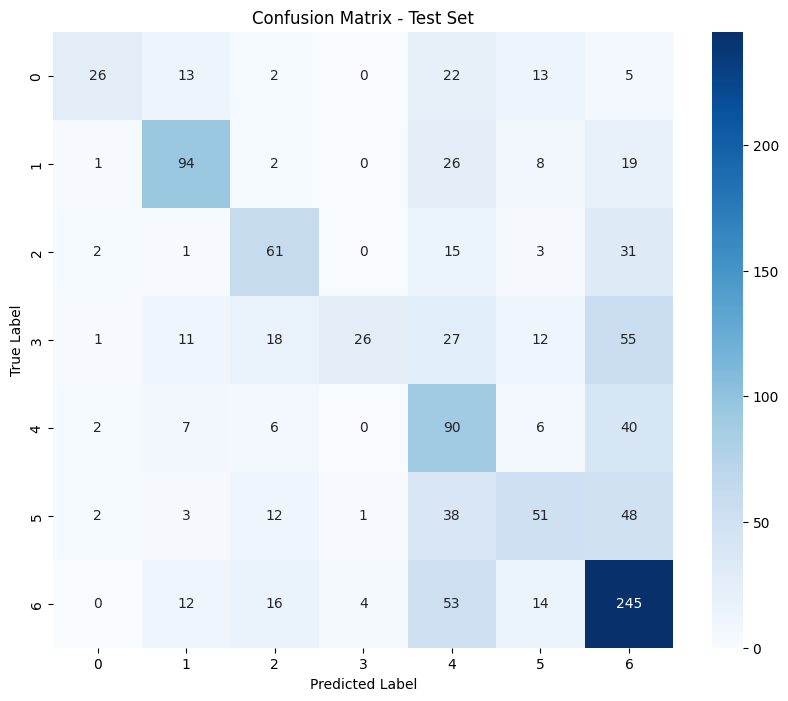

In [27]:
#
# ==================== Evaluating on the test set & Finding EVALUATION METRICS ====================

# Import necessary packages
from sklearn.metrics import classification_report, confusion_matrix

print("\nEVALUATING ON TEST SET...\n")

# Evaluate normally
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss     : {test_loss:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Get predictions for ALL test images
# [ Avoiding the last tiny incomplete batch from  ]
# [ getting discarded by using ceiling division   ]
y_pred_probs = model.predict(test_dataset, steps=(len(test_df) + BATCH_SIZE - 1) // BATCH_SIZE, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print count of input and output to ascertain that "Ceiling Division" worked
print(f"True labels  : {len(test_labels)} samples")
print(f"Predictions  : {len(y_pred)} samples")

# Getting string class names
class_names = [str(name) for name in le.classes_]

# Print detailed metrics for each class of the target variable
print("\nCLASSIFICATION REPORT")
print(classification_report(test_labels, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

##### **5.1.1 <u>My Findings about the data</u>**


The input data was in the form of a zip file.
This notebook took the input and put it through the following steps/transformations
<p><u>Following are some physical observations about the data (image files) and the initial data processing/manipulation steps that were carried out.</u></p>

1.   Files were extracted from a zip file.
2.   On extraction it was found to be porperly organised into correctly named folders, each signifying a type of waste material.
3. Each image is a 256 x 256 RGB file.
4. Image file names have no identifiable name to tag them to the class/type of waste material, so a function is created to assign folder names as class labels.
5. Once data files are read and their proper labels associated with them, the count of each type of waste material image file is plotted to see the frequency of the data and any substantial class imbalance.
6. Next we visualise few images from each category (this also verifies that labelling happened correctly)
7. Next we resize the images to one dimesion ( as all the input images were of the same dimension 256x256, hence it remained the same).





##### **5.1.2 <u>TRAIN-ing the model</u>**


I split the data into <i><b>train</b></i>, <i><b>validation</b></i> and <i><b>test</b></i>.

Train and validation data were purely <i><u>used for training</u></i>, and test was used for <i><u>model testing and evaluation</u></i>.
<br></br>
As the image sizes and volume of images needed a lot of memory, and the memory kept crashing, hence a different approach of using prefetch() method DatasetV2 from TensorFlow was used.
<br></br>
A CNN model with 3 convolution layers was created. The last layer (output layer), I used <i><b>GlobalAveragePooling2D</b></i> for better flattening for the large image dataset that we have.
<br></br>
The model was trained with callbacks.
Following configuration were used in callbacks
1. EarlyStopping
2. ReduceLROnPlateau

Both were used to improve the model effectively, without cauing <i>overfitting</i> (if only ReduceLROnPlateau was used) or stopping early, without giving the model a chance to train with <i>smaller learing rates</i> (if only EarlyStopping was used).
<br></br>
The following training and validation accuracy were observed over the epochs that ran. (19 of 25 )<BR></BR>



|  | Accuracy |
|---|---|
| Final Training Accuracy | **0.5919**  |
| Final Validation Accuracy | **0.4938** |
| Best Training Accuracy | **0.5919 (at epoch 19)** |
| Best Validation Accuracy | **0.5312 (at epoch 12)** |

<BR><BR>

##### **5.1.3 <u>Test-ing and evaluating the model</u>**

The following metrics were observed for the test dataset.

<br>**Test Accuracy - Test Accuracy : 0.5184 (51.84%)**

Following metrics were observed for the test dataset for model.


The model has not been tested with Augmentation. This might increase the accuracy further.